In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
import copy 

import numpy as np 

import multiprocessing
from multiprocessing import Pool
from contextlib import closing

import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.gridspec import GridSpec

# Put the fit_sersic.py, parameters.py, and priors.py files in the same folder
from fit_sersic import Sersic, display_model_1d
from fit_sersic import config_params, prof_curvefit, update_params 
from fit_sersic import emcee_fit_one_sersic, ln_probability, visual_emcee

# Install emcee sampling tool: `pip install --upgrade emcee`
# To visualize the result, also need `corner`: `pip install --upgrade corner`
rcParams.update({'font.size': 25})

In [2]:
import corner

In [3]:
from astropy.modeling import models, fitting
import matplotlib.colors as colors
import matplotlib.cm as cmx
from pylab import figure, text, scatter, show
from math import factorial
import h5py

In [4]:
all_profs = np.load('/Users/RAJ/2019_paper/paper_figures/fitting_files/summary_median.npy')

rad_kpc = all_profs['rad_kpc']

In [5]:
# n_walker should at least > n_dim ** 2
n_walkers = 128
n_burnin, n_samples = 2000, 500

# You might want to take advantage of the multiple processors you have
n_jobs = multiprocessing.cpu_count()

In [6]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_ins'], all_profs['bin_1_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 2.99484465 86.48434739 11.08635741]
Error of Sersic parameters from curvefit: [ 0.18310339 10.08012056  0.63526542]
# Running burn-in step...


100%|██████████| 2000/2000 [04:29<00:00,  7.43it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.021542968750000002
#------------------------------------------------------
#  Best ln(Probability):   -16.51035
[ 3.01711744 87.48356292 11.00948657]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.04687345 89.55697844 10.95479012]
#------------------------------------------------------
(3.0387444537867303, 0.24423192192963894, 0.2401723801752369)
(88.34175822159985, 14.954144312435673, 12.07236073724502)
(10.949655302015568, 0.7993895411131131, 0.816700589696925)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:40<00:00,  2.27it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.38140624999999995
#------------------------------------------------------
#  Best ln(Probability):   -16.50211
[ 2.99541669 86.55336187 11.08442474]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.05933848 90.89634813 10.88158803]
#------------------------------------------------------
(3.0475306902042387, 0.2373888552201775, 0.19846712116484522)
(89.02397489704124, 13.405522419639695, 10.35573721640398)
(10.918270233739964, 0.666640938086978, 0.7470742061071771)
#------------------------------------------------------


In [7]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_ins'], all_profs['bin_2_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.39443574 46.56212111 12.89267083]
Error of Sersic parameters from curvefit: [0.15103989 4.73698153 0.57663319]
# Running burn-in step...


100%|██████████| 2000/2000 [04:28<00:00,  7.45it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.030343750000000003
#------------------------------------------------------
#  Best ln(Probability):   -11.58289
[ 3.40919209 46.57987762 12.87166426]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.46850116 48.87054649 12.70727626]
#------------------------------------------------------
(3.4551433664340276, 0.29194541992264256, 0.26970473433593023)
(48.62769259510622, 9.921091973199204, 8.728940342380383)
(12.648490225617982, 1.1311311045213888, 0.9708271759472353)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:35<00:00,  2.32it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.35184375
#------------------------------------------------------
#  Best ln(Probability):   -11.58004
[ 3.38667074 46.06106258 12.94846408]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.45015505 48.52977168 12.76536526]
#------------------------------------------------------
(3.4583461824333406, 0.28705256219590014, 0.26489267590625953)
(48.61236995204355, 9.577970993706984, 8.235247209974787)
(12.62855016409579, 1.0707869526212281, 0.9706952369108244)
#------------------------------------------------------


In [8]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_ins'], all_profs['bin_3_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.31595109 35.64461093 13.44426098]
Error of Sersic parameters from curvefit: [0.41504821 8.26185962 1.37503531]
# Running burn-in step...


100%|██████████| 2000/2000 [06:20<00:00,  5.26it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.0161796875
#------------------------------------------------------
#  Best ln(Probability):   -16.02068
[ 4.3256726  36.01283928 13.40041148]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.63501104 42.41519927 12.74167565]
#------------------------------------------------------
(4.535399152228652, 0.7253735319014298, 0.6161940237910506)
(39.45627810570383, 16.488880842532012, 13.108235137765746)
(12.868674399599088, 2.333919655541669, 1.9156144851762544)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [05:44<00:00,  1.45it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.27003125
#------------------------------------------------------
#  Best ln(Probability):   -16.01365
[ 4.30100784 35.3832936  13.4914211 ]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.5678896  40.93921689 12.95850294]
#------------------------------------------------------
(4.521493582739531, 0.6573930479716354, 0.5645902677934491)
(39.172425063081576, 15.143881708629976, 10.282424444681162)
(12.853281790532927, 1.8585006457568483, 1.7590699372985448)
#------------------------------------------------------


In [9]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_ins'], all_profs['bin_4_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 3.08502258 19.82575701 17.89288221]
Error of Sersic parameters from curvefit: [0.16728386 1.11509847 0.50890092]
# Running burn-in step...


100%|██████████| 2000/2000 [09:50<00:00,  3.39it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.16149609375
#------------------------------------------------------
#  Best ln(Probability):    -9.73962
[ 3.07628192 19.83024005 17.89960684]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.15729836 20.09537906 17.77851257]
#------------------------------------------------------
(3.1472524769991232, 0.3056612722449259, 0.27121196219502375)
(20.001180639926048, 2.1049140336591634, 1.847691325383657)
(17.7628174426857, 0.8536123430332445, 0.881699572284333)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:25<00:00,  2.44it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.392625
#------------------------------------------------------
#  Best ln(Probability):    -9.73958
[ 3.08978765 19.89555098 17.86480045]
#------------------------------------------------------
#  Best parameters (mean):
[ 3.16419287 20.03507568 17.79691028]
#------------------------------------------------------
(3.157350251593386, 0.3281113278010577, 0.2827953642526948)
(20.10747124669639, 2.0418698625236544, 2.0353628668905337)
(17.734439374572837, 0.9193252431793262, 0.8678114918084319)
#------------------------------------------------------


In [10]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_ins, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_ins'], all_profs['bin_5_err_ins'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_ins = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_ins['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 6.08366667 22.60344327 15.25497074]
Error of Sersic parameters from curvefit: [0.63763536 3.59573986 1.18573656]
# Running burn-in step...


100%|██████████| 2000/2000 [06:00<00:00,  5.55it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.036968749999999995
#------------------------------------------------------
#  Best ln(Probability):   -12.58160
[ 6.10411388 22.91337849 15.17220728]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.70331666 25.06757162 14.90439604]
#------------------------------------------------------
(6.616222794425104, 1.4436838147394564, 1.2485814964426494)
(24.24363670945449, 8.849542827210886, 6.795604373625153)
(14.688771666109576, 2.468263463444922, 2.1098798237235137)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:48<00:00,  2.19it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.295015625
#------------------------------------------------------
#  Best ln(Probability):   -12.58123
[ 6.02061937 22.55185392 15.29542568]
#------------------------------------------------------
#  Best parameters (mean):
[ 6.69417173 25.52513083 14.71092353]
#------------------------------------------------------
(6.675090262686613, 1.3880752142966983, 1.2486670227870187)
(24.80653516848022, 8.577198487802132, 6.743972513904385)
(14.502735776130505, 2.3738912155604, 1.9031356089378182)
#------------------------------------------------------


In [11]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_1_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_1_prof_exs'], all_profs['bin_1_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_1_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_1_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.67200233 43.93138305 12.19812185]
Error of Sersic parameters from curvefit: [0.18636987 3.32703979 0.44481813]
# Running burn-in step...


100%|██████████| 2000/2000 [07:23<00:00,  4.51it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.04017578125
#------------------------------------------------------
#  Best ln(Probability):    -9.78427
[ 4.70451707 44.30355469 12.13978199]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.77073    46.44334725 11.97011304]
#------------------------------------------------------
(4.782849964014786, 0.41082938763795873, 0.4233727654996402)
(45.633662183733435, 8.169989132738941, 6.85957796636086)
(11.968133123178658, 0.9838596697414967, 0.8950792739444307)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:24<00:00,  2.45it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.34843749999999996
#------------------------------------------------------
#  Best ln(Probability):    -9.78207
[ 4.66093915 43.6366799  12.23519199]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.75730884 45.82244174 12.05095522]
#------------------------------------------------------
(4.747771679233857, 0.4146617419250953, 0.38017318937453837)
(45.30170149673275, 7.822720166400394, 6.905648171675814)
(12.006980177928721, 0.9980826472276991, 0.8690660564707802)
#------------------------------------------------------


In [12]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_2_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_2_prof_exs'], all_profs['bin_2_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_2_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_2_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.54267741 23.11312835 15.10800499]
Error of Sersic parameters from curvefit: [0.20098758 1.12867966 0.36395959]
# Running burn-in step...


100%|██████████| 2000/2000 [06:32<00:00,  5.10it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.11098828125
#------------------------------------------------------
#  Best ln(Probability):    -7.74861
[ 5.5526096  23.23081204 15.07218528]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.62264568 23.26630007 15.09809121]
#------------------------------------------------------
(5.610976954613473, 0.4970715677066817, 0.504415367079373)
(23.238643422138118, 3.00679000382134, 2.6892032604731035)
(15.047953761469, 0.9354838296772119, 0.8568335521570596)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:51<00:00,  2.92it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.3574375
#------------------------------------------------------
#  Best ln(Probability):    -7.74831
[ 5.54973322 23.19256656 15.08438694]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.55467382 23.23366618 15.14683909]
#------------------------------------------------------
(5.588401960617791, 0.5160930833261732, 0.47754307198037615)
(23.218044728426968, 2.903547164241157, 2.6258063821280686)
(15.072112450084706, 0.8967171570921693, 0.8304782234386572)
#------------------------------------------------------


In [13]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_3_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_3_prof_exs'], all_profs['bin_3_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_3_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_3_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 4.46919846 28.28443813 14.51679157]
Error of Sersic parameters from curvefit: [0.28512016 2.84032706 0.70377681]
# Running burn-in step...


100%|██████████| 2000/2000 [05:27<00:00,  6.10it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.05019140625
#------------------------------------------------------
#  Best ln(Probability):   -11.48418
[ 4.46577964 28.2146869  14.52587732]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.60636437 29.76089455 14.32334774]
#------------------------------------------------------
(4.5934625774885856, 0.5515110847290048, 0.5053256711536491)
(29.230374033086708, 6.490792466547145, 5.111328854612207)
(14.271258217317357, 1.3710930306272573, 1.3266242543082178)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [03:13<00:00,  2.58it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.33773437500000003
#------------------------------------------------------
#  Best ln(Probability):   -11.48316
[ 4.48764883 28.47954834 14.47083964]
#------------------------------------------------------
#  Best parameters (mean):
[ 4.63459511 30.47039598 14.15378436]
#------------------------------------------------------
(4.6368592630229095, 0.5374882587251983, 0.4999961983407726)
(29.83387544209659, 6.031996773384641, 5.0014138680462175)
(14.128249822654434, 1.3083788902438478, 1.2215596552615509)
#------------------------------------------------------


In [14]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_4_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_4_prof_exs'], all_profs['bin_4_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_4_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_4_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.41884363 14.61271617 18.49973168]
Error of Sersic parameters from curvefit: [0.2421725  0.69997235 0.43485886]
# Running burn-in step...


100%|██████████| 2000/2000 [09:01<00:00,  3.70it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.1829375
#------------------------------------------------------
#  Best ln(Probability):    -7.98210
[ 5.42089753 14.63399769 18.49024999]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.55934939 14.8198799  18.40063533]
#------------------------------------------------------
(5.525078159096512, 0.5301130571413681, 0.4955503689061942)
(14.737668321961369, 1.6610171558583424, 1.476368629479916)
(18.39438359258708, 0.9788484830863347, 0.9517320959723463)
#------------------------------------------------------
# Running final sampling step...


100%|██████████| 500/500 [02:56<00:00,  2.84it/s]


#------------------------------------------------------
#  Mean acceptance fraction 0.369984375
#------------------------------------------------------
#  Best ln(Probability):    -7.98245
[ 5.42190408 14.58730426 18.50848704]
#------------------------------------------------------
#  Best parameters (mean):
[ 5.56929261 14.84776067 18.39563449]
#------------------------------------------------------
(5.524731224686729, 0.5679304615209908, 0.5213045988112377)
(14.764123962407385, 1.746210635764637, 1.5299700634218194)
(18.386541025759705, 1.0030626380482737, 0.9863621310142534)
#------------------------------------------------------


In [6]:
with closing(Pool(processes=n_jobs)) as pool:
    bin_5_exs, burnin = emcee_fit_one_sersic(
        rad_kpc, all_profs['bin_5_prof_exs'], all_profs['bin_5_err_exs'], 
        pool=pool, n_walkers=n_walkers, n_burnin=n_burnin, n_samples=n_samples)
    
prof_samples_5_exs = [
    Sersic(rad_kpc, pos[0], pos[1], pos[2]) for 
    pos in bin_5_exs['chains'][:, -20:, :].reshape([-1, 3])]

Best-fit Sersic parameters from curvefit: [ 5.93693435  7.26964459 24.27919756]
Error of Sersic parameters from curvefit: [0.70058134 0.68957382 1.08308384]
# Running burn-in step...


  4%|▍         | 85/2000 [00:19<07:14,  4.41it/s]

emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:
  params: [ 3.09990772  4.61713716 29.29372913]
  params: [ 7.29965512  4.83670495 29.00939254]
  args: [<parameters.ProfileParams object at 0x112b90d30>, array([  0.        ,   6.56565657,  13.13131313,  19.6969697 ,
        26.26262626,  32.82828283,  39.39393939,  45.95959596,
        52.52525253,  59.09090909,  65.65656566,  72.22222222,
        78.78787879,  85.35353535,  91.91919192,  98.48484848,
       105.05050505, 111.61616162, 118.18181818, 124.74747475,
       131.31313131, 137.87878788, 144.44444444, 151.01010101,
       157.57575758, 164.14141414, 170.70707071, 177.27272727,
       183.83838384, 190.4040404 , 196.96969697, 203.53535354,
       210.1010101 , 216.66666667, 223.23232323, 229.7979798 ,
       236.36363636, 242.92929293, 249.49494949, 256.06060606,
       262.62626263, 269.19191919, 275.75757576, 282.32323232,
       288.88888889, 295.45454545, 302

       5.34653560e-04, 5.29948425e-04, 5.26825783e-04, 5.26315047e-04])]

  kwargs: {}
  kwargs: {}
  exception:
  exception:
emcee: Exception while calling your likelihood function:
emcee: Exception while calling your likelihood function:


Traceback (most recent call last):
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/emcee/ensemble.py", line 546, in __call__
    return self.f(x, *self.args, **self.kwargs)
Traceback (most recent call last):
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/emcee/ensemble.py", line 546, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 249, in ln_probability
    return ln_prior + lnlike_prof(theta, rad, rho, err)
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 105, in lnlike_prof
    chi2 = (Sersic(rad, params[0], params[1], params[2]) - rho) ** 2 / var
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 55, in Sersic
    return I_e * np.exp(-1 * b_n_exact(n) * (pow(R / r_e, 1.0 / n) - 1.0))
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 249, in ln_probability
    return ln_prio

KeyboardInterrupt: 

  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2108, in _minimize_scalar_brent
    brent.optimize()
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2108, in _minimize_scalar_brent
    brent.optimize()
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 1959, in optimize
    fu = func(*((u,) + self.args))      # calculate new output value
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 1959, in optimize
    fu = func(*((u,) + self.args))      # calculate new output value
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 66, in myfunc
    return abs(float(2 * GammaInc(2*n, 0, bn) - Gamma(2*n)))
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/ctx_mp_python.py", line 1012, in f
    return ctx.make_mpf(mpf_f(x._mpf_, prec, rounding))
  File 

  params: [ 2.58598748  7.08855627 26.06587936]


  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2076, in brent
    res = _minimize_scalar_brent(func, brack, args, **options)
Process ForkPoolWorker-1:
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2108, in _minimize_scalar_brent
    brent.optimize()
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 1959, in optimize
    fu = func(*((u,) + self.args))      # calculate new output value
Traceback (most recent call last):
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 66, in myfunc
    return abs(float(2 * GammaInc(2*n, 0, bn) - Gamma(2*n)))
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/ctx_mp_python.py", line 1012, in f
    return ctx.make_mpf(mpf_f(x._mpf_, prec,

  params: [20.16977646  1.46268304 31.38837834]


  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 105, in lnlike_prof
    chi2 = (Sersic(rad, params[0], params[1], params[2]) - rho) ** 2 / var
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 55, in Sersic
    return I_e * np.exp(-1 * b_n_exact(n) * (pow(R / r_e, 1.0 / n) - 1.0))


  args: [<parameters.ProfileParams object at 0x1048302b0>, array([  0.        ,   6.56565657,  13.13131313,  19.6969697 ,
        26.26262626,  32.82828283,  39.39393939,  45.95959596,
        52.52525253,  59.09090909,  65.65656566,  72.22222222,
        78.78787879,  85.35353535,  91.91919192,  98.48484848,
       105.05050505, 111.61616162, 118.18181818, 124.74747475,
       131.31313131, 137.87878788, 144.44444444, 151.01010101,
       157.57575758, 164.14141414, 170.70707071, 177.27272727,
       183.83838384, 190.4040404 , 196.96969697, 203.53535354,
       210.1010101 , 216.66666667, 223.23232323, 229.7979798 ,
       236.36363636, 242.92929293, 249.49494949, 256.06060606,
       262.62626263, 269.19191919, 275.75757576, 282.32323232,
       288.88888889, 295.45454545, 302.02020202, 308.58585859,
       315.15151515, 321.71717172, 328.28282828, 334.84848485,
       341.41414141, 347.97979798, 354.54545455, 361.11111111,
       367.67676768, 374.24242424, 380.80808081, 387.373737

  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 72, in b_n_exact
    b = brent(myfunc, (n,))


  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2076, in brent
    res = _minimize_scalar_brent(func, brack, args, **options)
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 2108, in _minimize_scalar_brent
    brent.optimize()


  kwargs: {}


  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/scipy/optimize/optimize.py", line 1959, in optimize
    fu = func(*((u,) + self.args))      # calculate new output value


  exception:


  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 66, in myfunc
    return abs(float(2 * GammaInc(2*n, 0, bn) - Gamma(2*n)))
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/functions/expintegrals.py", line 172, in gammainc
    return ctx._lower_gamma(z, b, regularized)


  args: [<parameters.ProfileParams object at 0x104837b70>, array([  0.        ,   6.56565657,  13.13131313,  19.6969697 ,
        26.26262626,  32.82828283,  39.39393939,  45.95959596,
        52.52525253,  59.09090909,  65.65656566,  72.22222222,
        78.78787879,  85.35353535,  91.91919192,  98.48484848,
       105.05050505, 111.61616162, 118.18181818, 124.74747475,
       131.31313131, 137.87878788, 144.44444444, 151.01010101,
       157.57575758, 164.14141414, 170.70707071, 177.27272727,
       183.83838384, 190.4040404 , 196.96969697, 203.53535354,
       210.1010101 , 216.66666667, 223.23232323, 229.7979798 ,
       236.36363636, 242.92929293, 249.49494949, 256.06060606,
       262.62626263, 269.19191919, 275.75757576, 282.32323232,
       288.88888889, 295.45454545, 302.02020202, 308.58585859,
       315.15151515, 321.71717172, 328.28282828, 334.84848485,
       341.41414141, 347.97979798, 354.54545455, 361.11111111,
       367.67676768, 374.24242424, 380.80808081, 387.373737

  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/functions/expintegrals.py", line 184, in _lower_gamma
    return ctx.hypercomb(h, [z])
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/functions/hypergeometric.py", line 128, in hypercomb
    [ctx.power(w,c) for (w,c) in zip(w_s,c_s)])


  kwargs: {}


  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/functions/hypergeometric.py", line 128, in <listcomp>
    [ctx.power(w,c) for (w,c) in zip(w_s,c_s)])
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/ctx_base.py", line 429, in power
    return ctx.convert(x) ** ctx.convert(y)


  exception:


Traceback (most recent call last):
  File "<string>", line 9, in __pow__
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/emcee/ensemble.py", line 546, in __call__
    return self.f(x, *self.args, **self.kwargs)
  File "/Users/RAJ/anaconda/envs/py7/lib/python3.7/site-packages/mpmath/libmp/libelefun.py", line 328, in mpf_pow
    return mpf_pow_int(s, (-1)**tsign * (tman<<texp), prec, rnd)
KeyboardInterrupt
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 249, in ln_probability
    return ln_prior + lnlike_prof(theta, rad, rho, err)
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 105, in lnlike_prof
    chi2 = (Sersic(rad, params[0], params[1], params[2]) - rho) ** 2 / var
  File "/Users/RAJ/2019_paper/paper_figures/fitting_files/fit_sersic.py", line 55, in Sersic
    return I_e * np.exp(-1 * b_n_exact(n) * (pow(R / r_e, 1.0 / n) - 1.0))
Traceback (most recent call last):
  File "/Users/RAJ/2019_paper/paper_figu

In [21]:
colors = plt.cm.plasma(np.linspace(0,1,10))

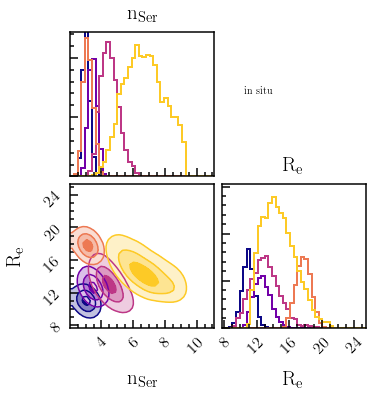

In [22]:
# Only plot the Sersic index and Re
bin1_ins_n_re = bin_1_ins['samples'][:, [0,2]]
bin2_ins_n_re = bin_2_ins['samples'][:, [0,2]]
bin3_ins_n_re = bin_3_ins['samples'][:, [0,2]]
bin4_ins_n_re = bin_4_ins['samples'][:, [0,2]]
bin5_ins_n_re = bin_5_ins['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_ins_n_re, bin2_ins_n_re,bin3_ins_n_re,bin4_ins_n_re,bin5_ins_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]



# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_ins_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_ins_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_ins_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_ins_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_ins_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_ins_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_ins_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_ins_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_ins_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_ins_n_re[:, 1], bins=40)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])

#setting the hist_weights
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_ins_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) * 2.2,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re))* 1.27 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_ins_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_ins_n_re)) *5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm in situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break





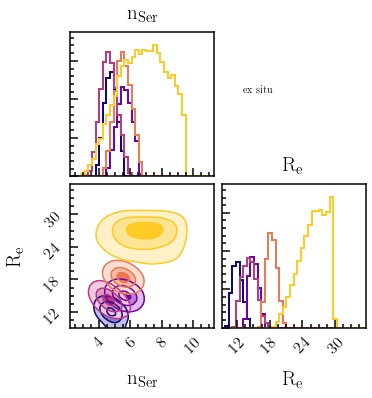

In [23]:
# Only plot the Sersic index and Re
bin1_exs_n_re = bin_1_exs['samples'][:, [0,2]]
bin2_exs_n_re = bin_2_exs['samples'][:, [0,2]]
bin3_exs_n_re = bin_3_exs['samples'][:, [0,2]]
bin4_exs_n_re = bin_4_exs['samples'][:, [0,2]]
bin5_exs_n_re = bin_5_exs['samples'][:, [0,2]]
params_label = [r'$ \rm n_{\rm Ser}$', r'$ \rm R_{\rm e}$']

all_samples = np.vstack([bin1_exs_n_re, bin2_exs_n_re,bin3_exs_n_re,bin4_exs_n_re,bin5_exs_n_re])

# Get the min and max ranges for Sersic index and Re
min_ranges = np.nanmin(all_samples, axis=0)
max_ranges = np.nanmax(all_samples, axis=0)

# X-Y ranges of the corner plot
corner_ranges = [(min_ranges[0] * 0.9, max_ranges[0] * 1.2), 
                 (min_ranges[1] * 0.9, max_ranges[1] * 1.2)]




# Also need to adjust the weight
ns_hist_1, _ = np.histogram(bin1_exs_n_re[:, 0], bins=40) 
ns_hist_2, _ = np.histogram(bin2_exs_n_re[:, 0], bins=40) 
ns_hist_3, _ = np.histogram(bin3_exs_n_re[:, 0], bins=40) 
ns_hist_4, _ = np.histogram(bin4_exs_n_re[:, 0], bins=40) 
ns_hist_5, _ = np.histogram(bin5_exs_n_re[:, 0], bins=40) 
re_hist_1, _ = np.histogram(bin1_exs_n_re[:, 1], bins=40) 
re_hist_2, _ = np.histogram(bin2_exs_n_re[:, 1], bins=40)
re_hist_3, _ = np.histogram(bin3_exs_n_re[:, 1], bins=40)
re_hist_4, _ = np.histogram(bin4_exs_n_re[:, 1], bins=40)
re_hist_5, _ = np.histogram(bin5_exs_n_re[:, 1], bins=40)

#setting the hist_weights
all_samples_ns = np.vstack([ns_hist_1,ns_hist_2,ns_hist_3,ns_hist_4,ns_hist_5])
all_samples_re = np.vstack([re_hist_1,re_hist_2,re_hist_3,re_hist_4,re_hist_5])
max_n = np.max(all_samples_ns)
max_re = np.max(all_samples_re)

hist_weight = np.sum([np.max(re_hist_1),np.max(re_hist_2),np.max(re_hist_3),np.max(re_hist_4),np.max(re_hist_5)])


# Colors for in-situ and ex-situ
ORG = plt.get_cmap('OrRd')



fig_bin1 = corner.corner(
        bin1_exs_n_re,
        bins=40, color=colors[0],
        range=corner_ranges,
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=True,
        title_fmt=None,
        verbose = False,
        title_kwargs={"fontsize": 21},
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[0],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.0,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin2_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[2],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[2],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.01,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin3_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[4],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[4],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) * 1.5,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin4_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[6],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0,
                     "edgecolor": colors[6],"linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re))* 1.5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

_ = corner.corner(
        bin5_exs_n_re ,
        fig=fig_bin1,
        range=corner_ranges,
        bins=40, color= colors[8],
        smooth=2, labels=params_label,
        label_kwargs={'fontsize': 21},
        #quantiles=[0.16, 0.5, 0.84],
        levels=[0.16, 0.50, 0.84],
        plot_contours=True,
        fill_contours=True,
        show_titles=False,
        hist_kwargs={"histtype": 'step', "alpha": 1.0, 
                     "edgecolor": colors[8], "linewidth": 2, "density": False},
        weights=np.ones(len(bin1_exs_n_re)) *5 ,
        use_math_text=True,
        **{ 'ranges': corner_ranges, 
           'plot_datapoints': False}
        )

for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)


for ax in fig_bin1.get_axes():
    ax.tick_params(axis='both', labelsize=16)
    text(1.3, 0.60,r'\rm ex situ',
         horizontalalignment='center',
         verticalalignment='center',
         transform = ax.transAxes)
    break


In [73]:
max_re

4304